# SVD

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from numpy.linalg import svd
from matplotlib.pyplot import imshow

from PIL import Image

# Implementado sobre una matriz

In [2]:
# varianza que tan disperso esta
# bias datos acertados
vmin = 0
vmax = 1
image_bias = 1 # sometimes 1

def plot_svd(A):
    n = len(A)
    imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    print("Imagen formada con la matriz de datos \n")
    plt.show()
    U, S, V = svd(A)
    print("La matriz U\n \n", U, "\n \n")
    print("La matriz Sigma\n \n", S, "\n \n")
    print("La matriz V\n \n", V, "\n \n")

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)
        
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num],2), fontsize=80)
    plt.show()
    
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U,S,V

In [3]:
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])

Imagen formada con la matriz de datos 



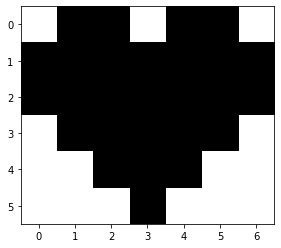

La matriz U
 
 [[-3.61249460e-01 -8.18355207e-17 -7.30296743e-01 -5.32180543e-02
   5.62467376e-01  1.30245091e-01]
 [-5.41874189e-01  3.53553391e-01  2.73861279e-01 -7.98270815e-02
  -1.59517007e-01  6.88879035e-01]
 [-5.41874189e-01  3.53553391e-01  2.73861279e-01 -7.98270815e-02
   1.59517007e-01 -6.88879035e-01]
 [-4.45394592e-01 -3.53553391e-01 -2.73861279e-01  5.17967494e-01
  -5.62467376e-01 -1.30245091e-01]
 [-2.77104327e-01 -7.07106781e-01  1.82574186e-01 -6.24403602e-01
  -7.94015750e-17 -1.63522882e-17]
 [-8.41451321e-02 -3.53553391e-01  4.56435465e-01  5.71185548e-01
   5.62467376e-01  1.30245091e-01]] 
 

La matriz Sigma
 
 [4.73981604e+00 1.41421356e+00 1.41421356e+00 7.30851490e-01
 2.01318250e-16 1.22704299e-16] 
 

La matriz V
 
 [[-2.28647772e-01 -3.98832447e-01 -4.57295545e-01 -3.98832447e-01
  -4.57295545e-01 -3.98832447e-01 -2.28647772e-01]
 [ 5.00000000e-01  2.50000000e-01 -2.50000000e-01 -5.00000000e-01
  -2.50000000e-01  2.50000000e-01  5.00000000e-01]
 [ 3.8729

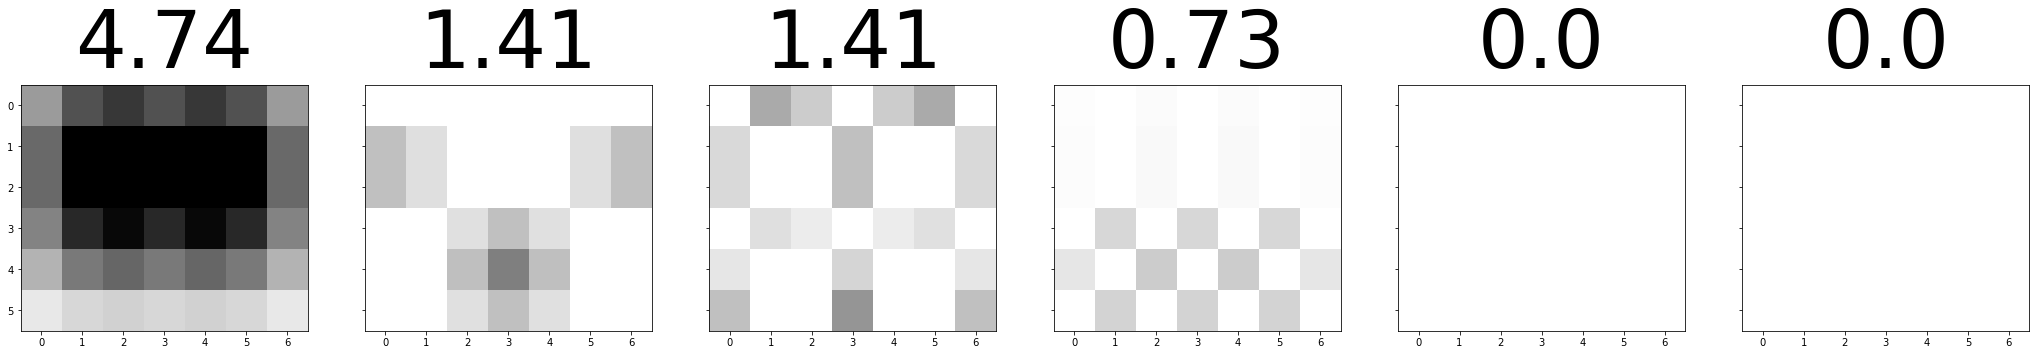

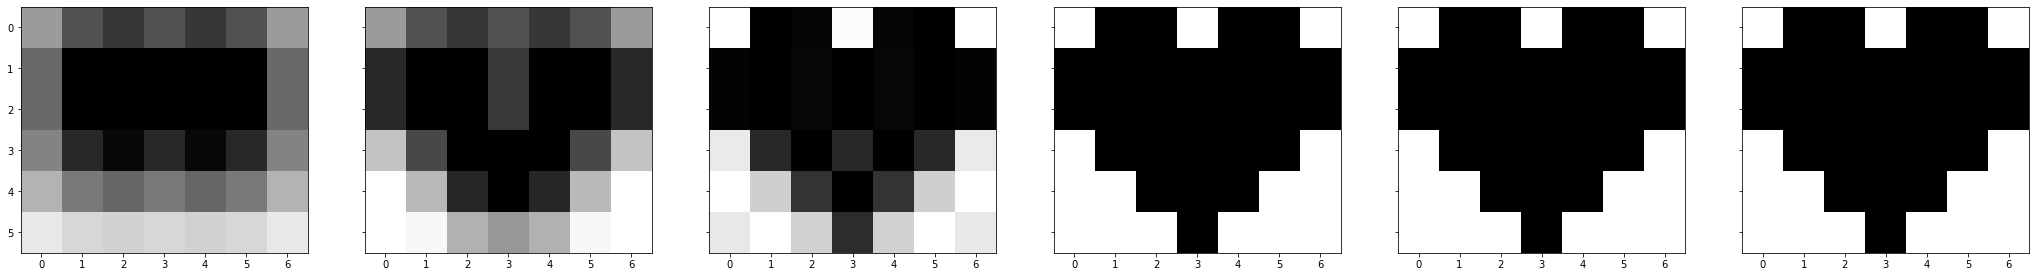

In [4]:
U,S,V = plot_svd(D)

# Implementado sobre una imagen

En este notebook exploramos como podemos utilizar la SVD para realizar la **compression de una imagen** y ir viendo que a medida que realizamos la reduccion de dimensiones vamos **perdiendo informacion** y como esto afecta a la misma.

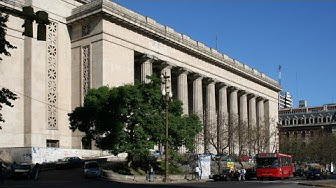

In [5]:
# obtenemos la imagen para poder trabajarla
# 336 x 188
img = Image.open('fiuba.jpg')
img

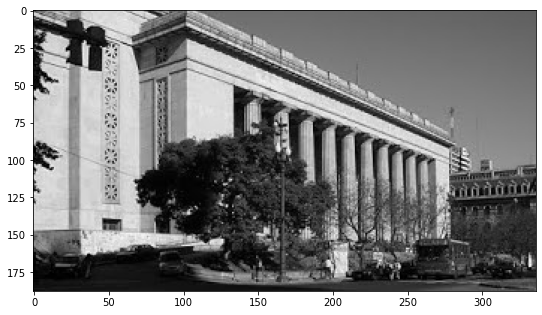

In [6]:
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

In [7]:
# llevamos la imagen a una representacion matricial con numpy 
# para poder operar
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [8]:
imgmat

matrix([[ 68.,   6., 104., ...,  95.,  95.,  95.],
        [182., 147.,  93., ...,  96.,  95.,  95.],
        [212., 212., 217., ...,  96.,  96.,  96.],
        ...,
        [ 15.,  15.,  15., ..., 107.,  96.,  82.],
        [ 24.,  24.,  25., ...,  87.,  88., 108.],
        [ 10.,  10.,  11., ...,  69.,  71.,  92.]])

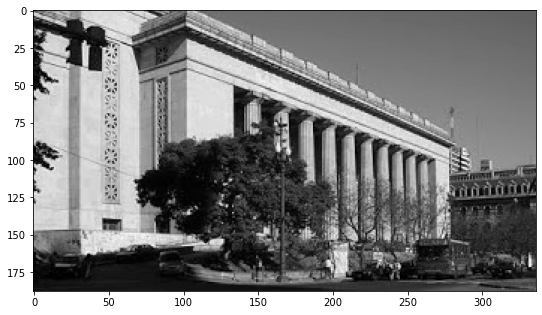

In [9]:
# realizamos el plot a partir de la matriz (no la imagen)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [10]:
# realizamos la descomposicion en valores singulares
u, s, v = np.linalg.svd(imgmat)

## Analisis de valores singulares

## Calculo de la energia

In [11]:
# calculo de energia
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[8.36569841e+01 4.71498122e+00 1.69211659e+00 1.15188306e+00
 9.92564368e-01 8.32048754e-01 5.11268757e-01 4.62435354e-01
 4.22827266e-01 4.03974434e-01 3.47473430e-01 2.79071829e-01
 2.53688462e-01 2.15809942e-01 2.00629024e-01 1.96410114e-01
 1.76977040e-01 1.56667680e-01 1.37389692e-01 1.26902987e-01
 1.17002691e-01 1.16779189e-01 1.10042215e-01 1.04876145e-01
 9.66417188e-02 8.70309155e-02 8.50777054e-02 7.93164156e-02
 7.51999185e-02 7.01589231e-02 6.77839412e-02 6.24052701e-02
 6.06035500e-02 6.00119057e-02 5.77200078e-02 5.55532822e-02
 5.31751106e-02 5.12636058e-02 4.93782782e-02 4.79089155e-02
 4.54732215e-02 4.45564190e-02 4.38856287e-02 4.18934739e-02
 4.14396358e-02 4.02915837e-02 3.80007238e-02 3.74243154e-02
 3.65098764e-02 3.41711474e-02 3.32937111e-02 3.19070809e-02
 3.10547972e-02 3.04416644e-02 2.95805074e-02 2.87296012e-02
 2.77517516e-02 2.72561748e-02 2.55617379e-02 2.45539869e-02
 2.41824850e-02 2.34333225e-02 2.24875423e-02 2.23138646e-02
 2.11467615e-02 2.065955

In [12]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno de los valores singualres
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 30120.91024280557 83.66%
Number of Singular Values 2: 7150.838560219685 88.37%
Number of Singular Values 3: 4283.829055724935 90.06%
Number of Singular Values 4: 3534.4446594672427 91.22%
Number of Singular Values 5: 3280.925206288738 92.21%
Number of Singular Values 6: 3003.9408529898 93.04%
Number of Singular Values 7: 2354.7327123243413 93.55%
Number of Singular Values 8: 2239.4558469527306 94.01%
Number of Singular Values 9: 2141.4033729088856 94.44%
Number of Singular Values 10: 2093.119050724073 94.84%
Number of Singular Values 11: 1941.2335583890474 95.19%
Number of Singular Values 12: 1739.7025075525414 95.47%
Number of Singular Values 13: 1658.6981022142706 95.72%
Number of Singular Values 14: 1529.863608690894 95.94%
Number of Singular Values 15: 1475.0742109050088 96.14%
Number of Singular Values 16: 1459.4825739555574 96.33%
Number of Singular Values 17: 1385.4008607530923 96.51%
Number of Singular Values 18: 1303.4869767785 96.67%
Number of Sin

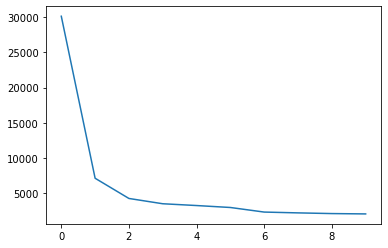

In [13]:
# realizamos un plot de los valores singulaes
# es interesante ir reduciendo el rango para poder 
# verificar algun posible 'codo' para poder considerar 
# la dimensionalidad intrinseca de los datos
plt.plot(s[:10])

## Reconstruyendo la imagen a partir de los datos reducidos

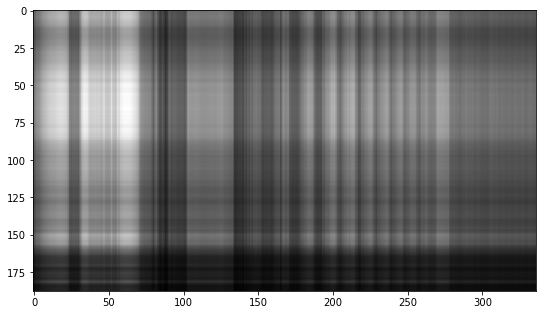

In [14]:
# Primer valor singular
reconstimg = np.matrix(u[:, :1]) * np.diag(s[:1]) * np.matrix(v[:1, :])
plt.figure(figsize=(9,6))
plt.imshow(reconstimg, cmap='gray');

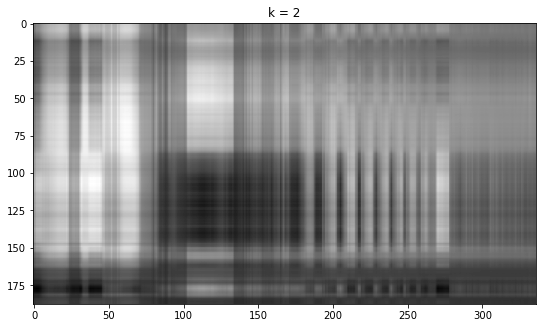

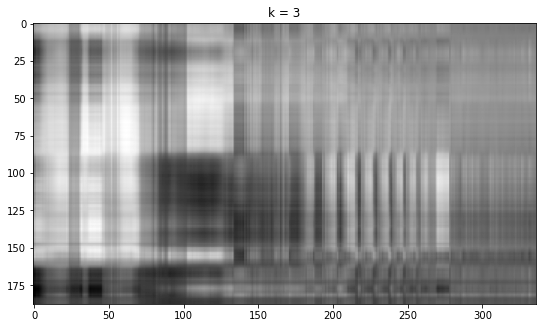

In [15]:
for i in range(2, 4):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()

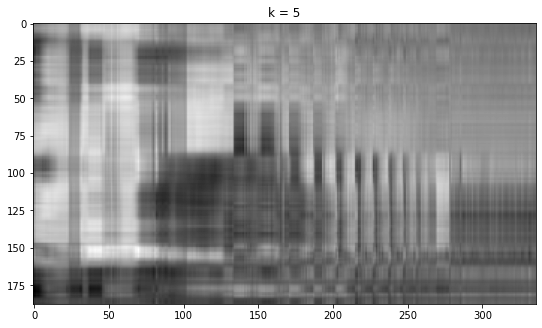

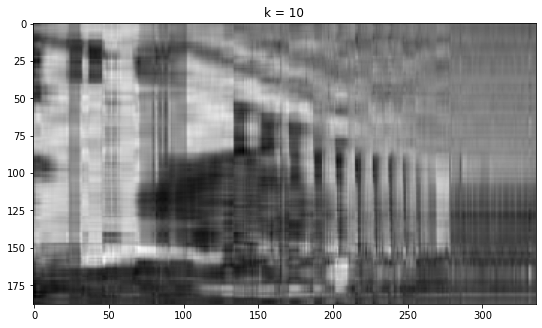

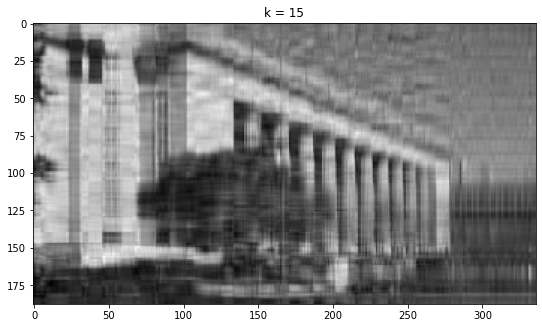

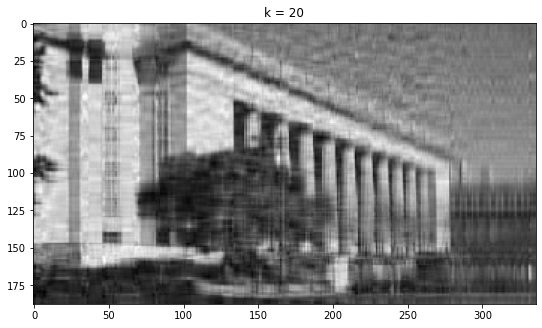

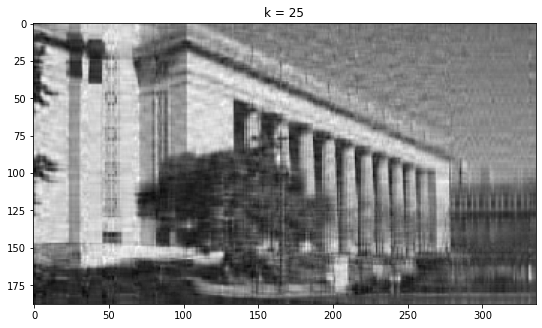

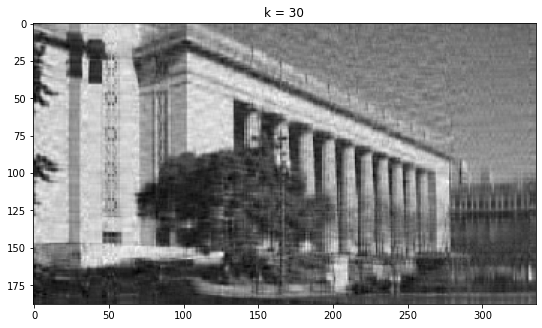

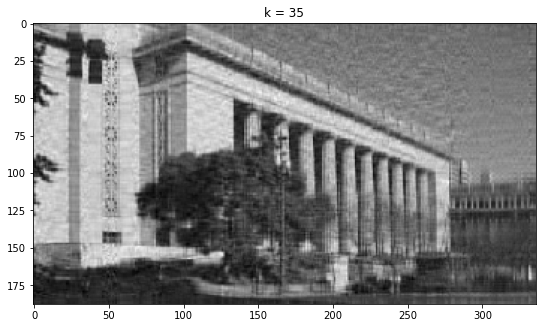

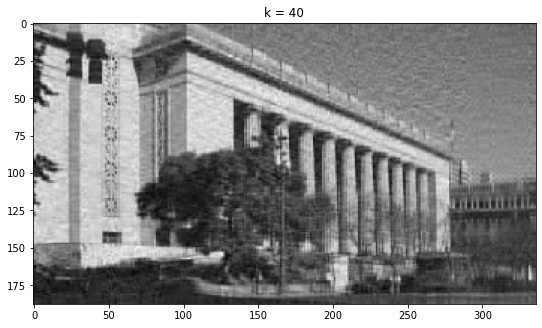

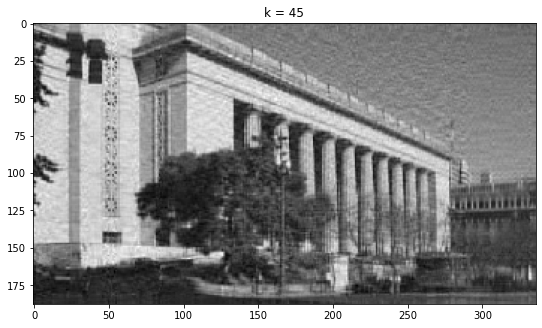

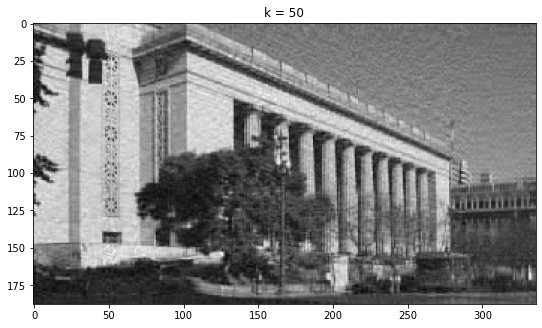

In [16]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()

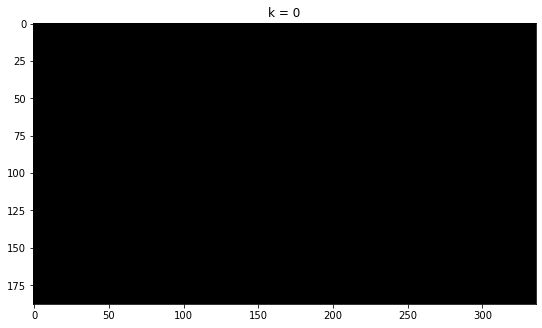

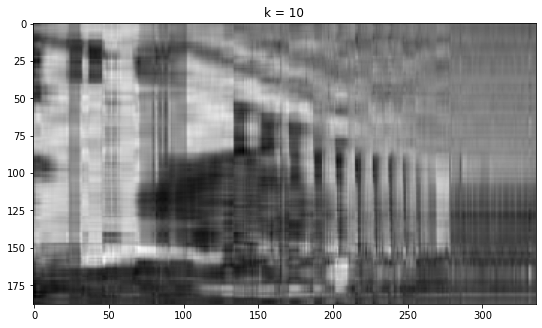

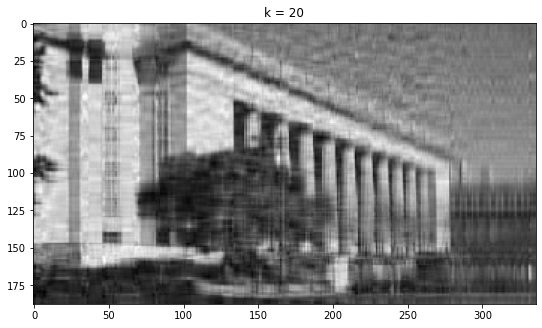

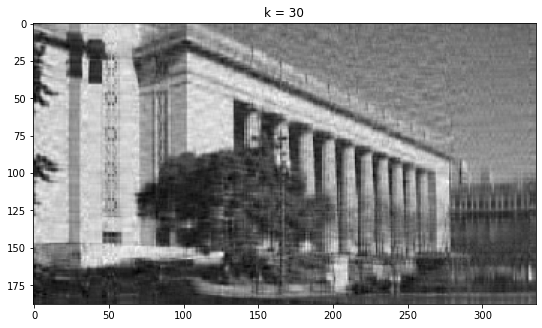

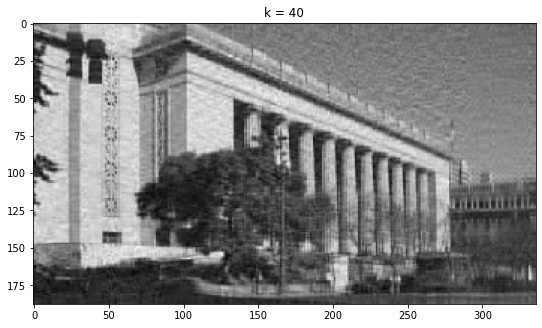

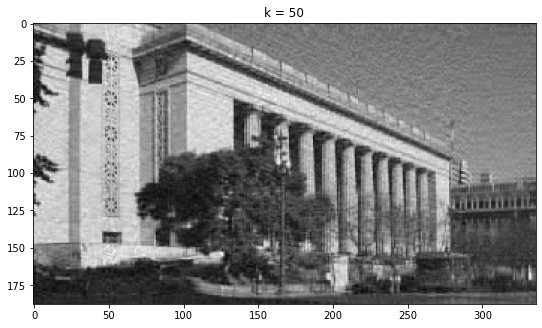

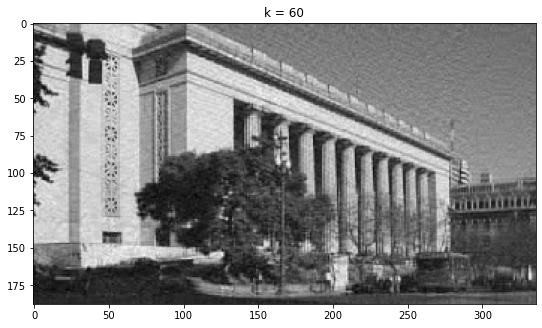

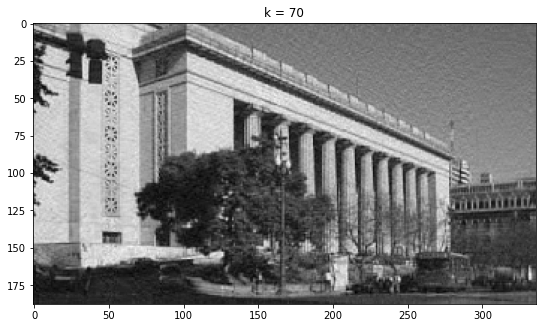

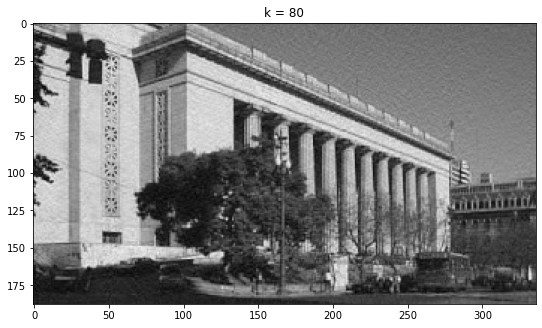

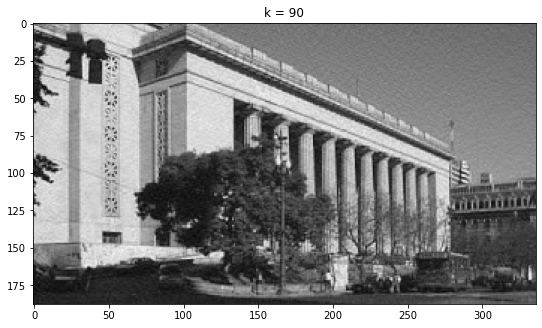

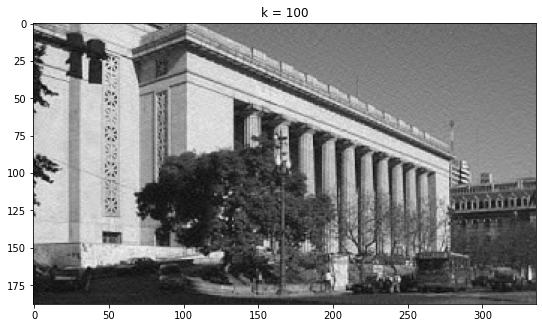

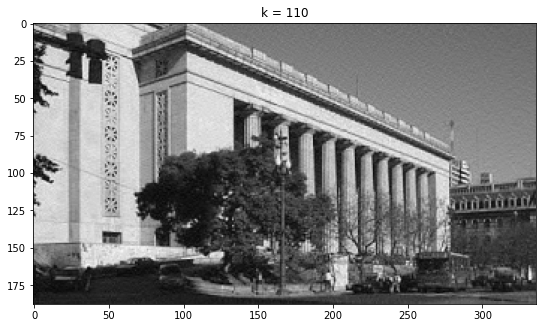

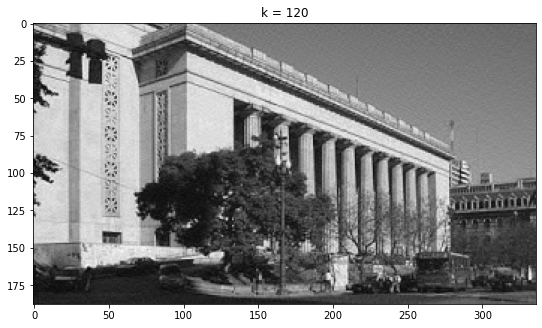

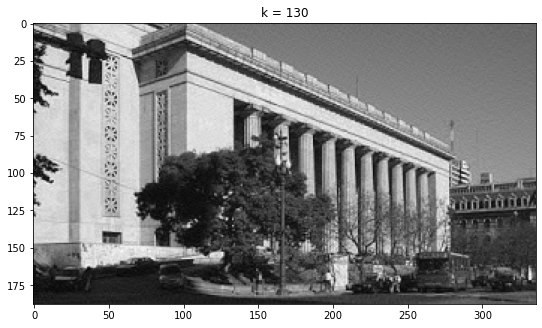

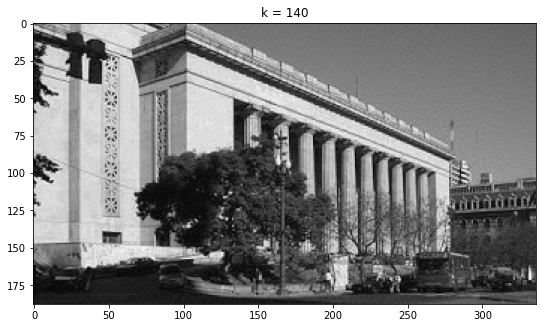

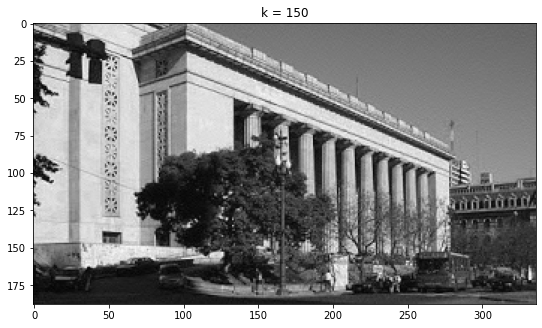

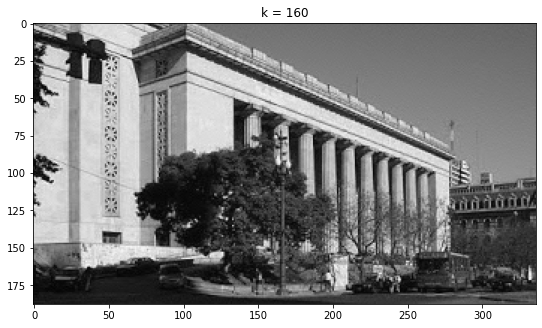

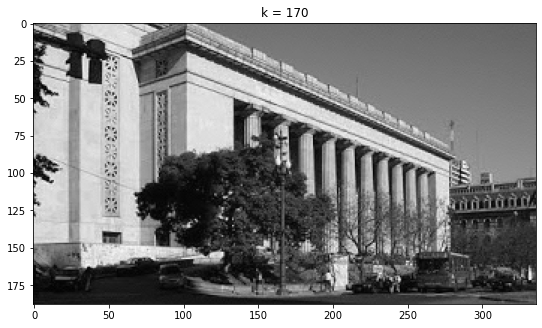

In [17]:
for i in range(0, 180, 10):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()